In [ ]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df = pd.read_csv('tiktok.csv', encoding='latin1')

# Display dataset
df.head()


,Comment,likes
0,joki strava bawa 10 hp pas lari ð­,21K
1,anjir sumpah ada yg joki strava?ð¥²,9722
2,bukanya dulu strava tempat download lagu???,325
3,"misal saya jd joki strava,pelanggan kasih ipho...",2471
4,knp gk naik sepeda tpi stravany lari bukan str...,383


# 1. Cleaning Data

In [ ]:
df.shape

(942, 2)

In [ ]:
df.duplicated().sum()

123

In [ ]:
df = df.drop_duplicates('Comment')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Comment,1
likes,0


In [ ]:
df  = df.dropna()
df.isnull().sum()

,0
Comment,0
likes,0


In [ ]:
df.shape

(812, 2)

In [ ]:
# Function to clean text: remove special characters and convert to lowercase
def clean_text(text):
    if isinstance(text, str):  # Check if the value is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^a-z\s]', '', text)  # Remove any non-alphabetic characters (including emojis)
        text = re.sub(r'@[A-Za-z0-9_]+', '', text)
        text = re.sub(r'#[A-Za-z0-9_]+', '', text)
        text = re.sub(r'RT[\s]+', '', text)
        text = re.sub(r'https?:\/\/\S+', '', text)
        text = re.sub(r'[^A-Za-z0-9 ]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = ''  # Handle non-string values (e.g., NaN or float)
    return text

# Apply cleaning function to the 'Comment' column
df['Comment'] = df['Comment'].apply(clean_text)
df


,Comment,likes
0,joki strava bawa hp pas lari,21K
1,anjir sumpah ada yg joki strava,9722
2,bukanya dulu strava tempat download lagu,325
3,misal saya jd joki stravapelanggan kasih iphon...,2471
4,knp gk naik sepeda tpi stravany lari bukan str...,383
...,...,...
935,gw pernah pas kerja ngidupin starva karna kerj...,0
936,cara buka awal usaha ginian gimana ya sehari a...,0
937,seriusan ada joki nya,0
939,gw mau open joki lumayan kardio dapet duit,0


# 2. Preprocessing


## 2.1 Normalisasi


In [ ]:
# Norm
normalization_dict = {
    'gw': 'gua',
    'bg': 'bang',
    'gk': 'tidak',
    'ga': 'tidak',
    'yg': 'yang',
    'kmu': 'kamu',
    'aku': 'saya',
    'tp': 'tapi',
    'knp': 'kenapa',
    'bgt': 'banget',
    'tdk': 'tidak',
    'blm': 'belum',
    'sm': 'sama',
    'jd': 'jadi',
    'dmn': 'dimana',
    'lg': 'lagi',
    'dr': 'dari',
    'sy': 'saya',
    'trs': 'terus',
    'donlod': 'download',
    'tpi': 'tapi',
    'emg': 'emang',
    'bwt': 'buat',
    'y': 'ya',
    'padal': 'padahal',
    'bneran': 'beneran',
    'srius': 'serius',
    'tny': 'tanya',
    'mmg': 'memang',
    'mehasilkan': 'menghasilkan',
    'stravs': 'strava',
    'kirai': 'kirain',
    'knpa': 'kenapa',
    'ad': 'ada',
    'gin': 'gini',
    'mmg': 'memang',
    'gbalik': 'gabalik',
    'karna': 'karena',
    'gtu': 'gitu',
    'jjur': 'jujur',
    'tpi': 'tapi',
    'gmn': 'gimana',
    'joli': 'joki',
    'bused': 'buset',
    'knp': 'kenapa',
    'sampe': 'sampai',
    'cma': 'cuma',
    'gin': 'gini',
    'dpt': 'dapet',
    'pgn': 'pengen',
    'd': 'di',
    'enk': 'enak',
    'utk': 'untuk',
    'psti': 'pasti',
    'skit': 'sakit',
    'udh': 'udah',
    'bgini': 'begini',
    'btr': 'bentar',
    'kasi': 'kasih',
    'apkh': 'apakah',
    'klu': 'kalau',
    'kl': 'kalau',
    'klo': 'kalau'
}

def normalize_text(text):
    words = text.split()
    words = [normalization_dict.get(word, word) for word in words]
    return ' '.join(words)

# Normalisasi
df['Comment'] = df['Comment'].apply(normalize_text)
df['Comment']

,Comment
0,joki strava bawa hp pas lari
1,anjir sumpah ada yang joki strava
2,bukanya dulu strava tempat download lagu
3,misal saya jadi joki stravapelanggan kasih iph...
4,kenapa tidak naik sepeda tapi stravany lari bu...
...,...
935,gua pernah pas kerja ngidupin starva karena ke...
936,cara buka awal usaha ginian gimana ya sehari a...
937,seriusan ada joki nya
939,gua mau open joki lumayan kardio dapet duit


## 2.2 Stopword

In [ ]:
!pip install Sastrawi
!pip install nltk

In [ ]:
# import string
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# import nltk

# # Download environment nltk
# nltk.download('stopwords')
# nltk.download('punkt_tab')

# # Stopword buat indonesian
# stop_words = set(stopwords.words('indonesian'))

# # Tokenisasi dan stopword removal
# def preprocess_text(text):
#     tokens = word_tokenize(text)  # Tokenisasi
#     tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]  # Hapus stopwords dan tanda baca
#     return tokens

# # Tokenisasi dan Stopword Removal
# df['Tokenized_Comment'] = df['Normalized_Comment'].apply(preprocess_text)
# df[['Cleaned_Comment', 'Tokenized_Comment']].head()

In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

# Daftar stopword
more_stop_words = ["saya", "gua", "kamu", "dia", "mereka", "adalah", "si", "sih", 'ya', 'kan', 'deh', 'nih', 'sih', 'dong', 'loh', 'aja', 'tuh',
    'wkwk', 'haha', 'sm', 'jd', 'utk', 'tp', 'krn', 'lg', 'btw', 'btwnya', 'btwan', 'dm', 'pm', 'link', 'lah', 'pun', 'hah']

# Ambil stopwords default dari sastrawi
stop_words = StopWordRemoverFactory().get_stop_words()

# Tambahkan dari more_stop_words
stop_words.extend(more_stop_words)

# Buat dictionary for stopword remover
new_array = ArrayDictionary(stop_words)
stopword_remover = StopWordRemover(new_array)

# Function
def stopword(str_text):
  return stopword_remover.remove(str_text)

# Stopword
df['Comment'] = df['Comment'].apply(lambda x: stopword(x))
df

,Comment,likes
0,joki strava bawa hp pas lari,21K
1,anjir sumpah yang joki strava,9722
2,bukanya dulu strava tempat download lagu,325
3,misal jadi joki stravapelanggan kasih iphone p...,2471
4,tidak naik sepeda stravany lari bukan strava s...,383
...,...,...
935,pernah pas kerja ngidupin starva kerja jalanla...,0
936,cara buka awal usaha ginian gimana sehari atog...,0
937,seriusan joki nya,0
939,mau open joki lumayan kardio dapet duit,0


## 2.3 Tokenisasi

In [ ]:
tokenized = df['Comment'].apply(lambda x: x.split())
tokenized.head()

,Comment
0,"[joki, strava, bawa, hp, pas, lari]"
1,"[anjir, sumpah, yang, joki, strava]"
2,"[bukanya, dulu, strava, tempat, download, lagu]"
3,"[misal, jadi, joki, stravapelanggan, kasih, ip..."
4,"[tidak, naik, sepeda, stravany, lari, bukan, s..."


## 2.4 Stemming

In [ ]:
print("Sebelum Stemming:")
print(tokenized.head(10))

Sebelum Stemming:
0                  [joki, strava, bawa, hp, pas, lari]
1                  [anjir, sumpah, yang, joki, strava]
2      [bukanya, dulu, strava, tempat, download, lagu]
3    [misal, jadi, joki, stravapelanggan, kasih, ip...
4    [tidak, naik, sepeda, stravany, lari, bukan, s...
5                      [joki, strava, bawa, pergi, hp]
6    [kalo, joki, kurus, nggadia, olahraga, gue, ku...
7    [mau, nanya, serius, joki, strava, emang, buat...
8    [malah, kepikiran, hp, ama, smartwatch, dibawa...
9                  [badan, sehat, duit, dapet, jirlah]
Name: Comment, dtype: object


In [ ]:
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# # Stemming dengan Sastrawi
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# def stemming(text):
#     if isinstance(text, list):  # Pastikan input adalah list
#         return " ".join([stemmer.stem(word) for word in text])  # Gabungkan kembali menjadi string
#     return ""  # Jika bukan list (misal NaN), kembalikan string kosong

# # def stemming(text):
# #     return [stemmer.stem(word) for word in text] if isinstance(text, list) else []

# tokenized = tokenized.apply(stemming)

# # Simpan ke CSV
# tokenized.to_csv("hasil_preprocessing.csv", index=False, encoding="utf-8")

# # Tampilkan hasil
# tokenized.head(10)


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat stemmer
def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)
tokenized.to_csv("hasil_preprocessing.csv", index=False)

joki strava bawa hp pas lari
anjir sumpah yang joki strava
buka dulu strava tempat download lagu
misal jadi joki stravapelanggan kasih iphone pro lari gak balik gimana
tidak naik sepeda stravany lari bukan strava sepeda pernah nyoba km pace
joki strava bawa pergi hp
kalo joki kurus nggadia olahraga gue kurus plis butuh
mau nanya serius joki strava emang buat apa buat story doang soal tiap lari km pake strava cuma buat cek pacejarak doang g pikir buat story
malah pikir hp ama smartwatch bawa ama joki yak apa takut bawa kabur otak mentok situ
badan sehat duit dapet jir
harga joki strava km pace brapa
emang beneran buat apa
serius baru tau joki strava
gue pngn jadi joki strava sini gue joki in
temen bener yang jadi joki strava
joki lari adajoki foto atas gunung adajoki bawa oleh luar negri adajoki skripsijoki cpnsapa gengs
udah sehat dapet duit
kalo hapenya bawa kabur bijimane
guna buat apaa serius tanya
sekarang gue gatau joki strava manfaat mana
tanya yang pd joki biar ape
enak joki uda

# 3. Translate

In [ ]:
!pip install translate

In [ ]:
data = pd.read_csv ('hasil_preprocessing.csv')
data

,Comment
0,joki strava bawa hp pas lari
1,anjir sumpah yang joki strava
2,buka dulu strava tempat download lagu
3,misal jadi joki stravapelanggan kasih iphone p...
4,tidak naik sepeda stravany lari bukan strava s...
...,...
807,pernah pas kerja ngidupin starva kerja jalanla...
808,cara buka awal usaha ginian gimana hari atoga ...
809,serius joki nya
810,mau open joki lumayan kardio dapet duit


In [ ]:
data.isnull().sum()
data.dropna(inplace=True)

In [ ]:
!pip install googletrans

In [ ]:
from googletrans import Translator

# Inisialisasi translator
translator = Translator()

def translate_eng(tiktok):
    try:
        translation = translator.translate(tiktok, src='id', dest='en')
        return translation.text
    except Exception as e:
        return f"Error: {e}"

# Terapkan pada kolom
data['english_comment'] = data['Comment'].apply(translate_eng)
data.to_csv('dataTerjemahanStrava.csv')


In [ ]:
# from translate import Translator

# # Inisialisasi translator
# def translate_eng(tiktok):
#   translator = Translator(from_lang="id", to_lang="en")
#   translation = translator.translate(tiktok)
#   return translation

# data['english_comment'] = data['Comment'].apply(translate_eng)
# data.to_csv('dataTerjemahanStrava.csv')


# 4. Labelling

In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
data = pd.read_csv('dataTerjemahanStrava.csv', index_col=0)
data

,Comment,english_comment
0,joki strava bawa hp pas lari,Strava Jockey Bring Hp Running
1,anjir sumpah yang joki strava,Anjir Oath Yang Jockey Strava
2,buka dulu strava tempat download lagu,Open Strava where to download the song
3,misal jadi joki stravapelanggan kasih iphone p...,for example so a string jockey customer loves ...
4,tidak naik sepeda stravany lari bukan strava s...,not riding a bicycle stravany running instead ...
...,...,...
807,pernah pas kerja ngidupin starva kerja jalanla...,"I once worked when I turned on the Strava, the..."
808,cara buka awal usaha ginian gimana hari atoga ...,how to open the initial business like this how...
809,serius joki nya,Seriously the jockey
810,mau open joki lumayan kardio dapet duit,Want to open enough cardio jockey to get money


In [ ]:
data.isnull().sum()

,0
Comment,0
english_comment,0


In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
from textblob import TextBlob

# === 1️⃣ Konversi Data ke List ===
data_comment = list(data['english_comment'])  # Ambil komentar dari DataFrame

# === 2️⃣ Inisialisasi Variabel ===
polaritas = 0
status = []
total_positif = total_negatif = total_netral = total = 0

# === 3️⃣ Looping untuk Menganalisis Setiap Komentar ===
for i, comment in enumerate(data_comment):
    analysis = TextBlob(comment)  # Analisis sentimen dengan TextBlob
    polaritas += analysis.sentiment.polarity  # Akumulasi polaritas

    # Menentukan kategori sentimen
    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1  # Tambahkan total data yang diproses

# Simpan hasil ke DataFrame
data['Sentiment'] = status  # Tambahkan hasil analisis ke dalam DataFrame

# Tampilkan hasil analisis
print(f"Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data : {total}")

# Simpan ke CSV
data.to_csv("hasil_sentimen_textblob.csv", index=False, encoding="utf-8")




Hasil Analisis Data:
Positif = 146
Netral = 528
Negatif = 80

Total Data : 754


In [ ]:
data

,Comment,english_comment,Sentiment
0,joki strava bawa hp pas lari,Strava Jockey Bring Hp Running,Netral
1,anjir sumpah yang joki strava,Anjir Oath Yang Jockey Strava,Netral
2,buka dulu strava tempat download lagu,Open Strava where to download the song,Netral
3,misal jadi joki stravapelanggan kasih iphone p...,for example so a string jockey customer loves ...,Netral
4,tidak naik sepeda stravany lari bukan strava s...,not riding a bicycle stravany running instead ...,Netral
...,...,...,...
807,pernah pas kerja ngidupin starva kerja jalanla...,"I once worked when I turned on the Strava, the...",Positif
808,cara buka awal usaha ginian gimana hari atoga ...,how to open the initial business like this how...,Netral
809,serius joki nya,Seriously the jockey,Negatif
810,mau open joki lumayan kardio dapet duit,Want to open enough cardio jockey to get money,Netral


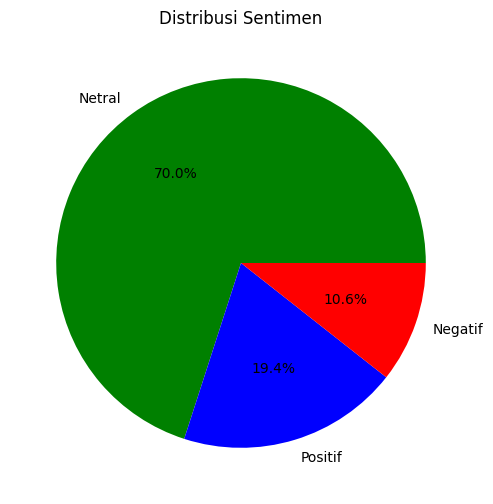

<ipython-input-31-0b9bd7f80735>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'blue', 'red'])


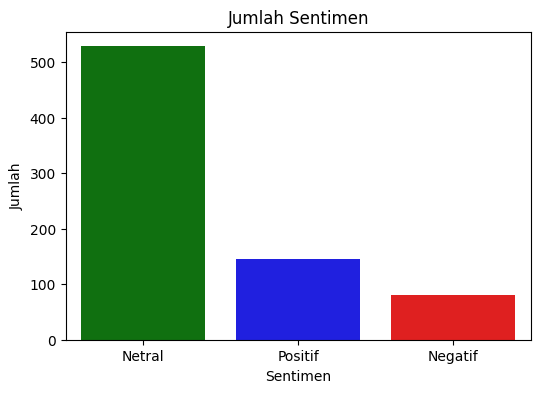

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah sentimen
sentiment_counts = data['Sentiment'].value_counts()

# === Pie Chart ===
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'blue', 'red'])
plt.title("Distribusi Sentimen")
plt.show()

# === Bar Chart ===
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'blue', 'red'])
plt.title("Jumlah Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()


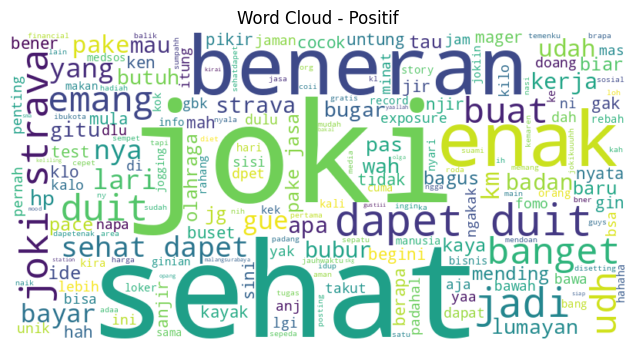

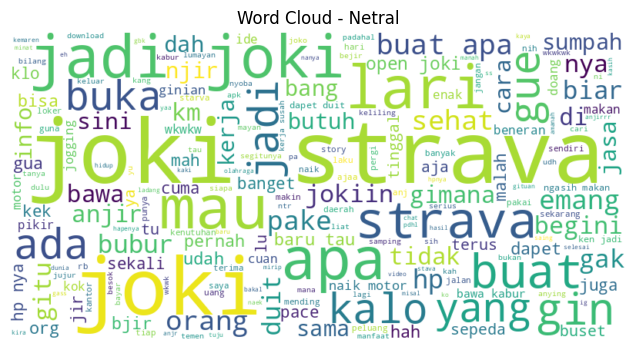

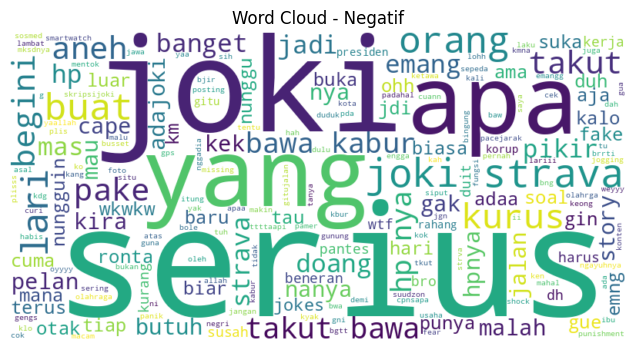

In [ ]:
from wordcloud import WordCloud

# Gabungkan semua teks berdasarkan sentimen
positive_text = " ".join(data[data['Sentiment'] == 'Positif']['Comment'])
neutral_text = " ".join(data[data['Sentiment'] == 'Netral']['Comment'])
negative_text = " ".join(data[data['Sentiment'] == 'Negatif']['Comment'])

# Fungsi untuk menampilkan Word Cloud
def show_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Tampilkan Word Cloud
show_wordcloud(positive_text, "Word Cloud - Positif")
show_wordcloud(neutral_text, "Word Cloud - Netral")
show_wordcloud(negative_text, "Word Cloud - Negatif")
